## Schwarchild like solution
Idea is to (likely numerically?) figure out a solution with Katz like energy - with energy counted as mass.


In [91]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


#I was looking for a horizon, there is none :),  

so i looked for rbar is at 1.15*Mass in isotropic coordinates. Note how the convergence is to 0.15 - the slope is linear 

Code is removed for this, but it shows that convergence is assured at q million points...

## more accurate way, rbar = rbar + dr/2 - use halfway along dr
| Points   | solution|
| -------- | ------- |
| 20000     | 0.13509986497166324    |
| 200000 | 0.15009985040898566     |
| 2000000    | 0.15134985246630017    |
| 10000000    | 0.1514798589950413    |


## less accurate way, rbar = rbar - use starting point of dr, so expect it to be worse.
| Points   | solution|
| -------- | ------- |
| 20000     | 0.10009989997166319    |
| 200000 | 0.1480998524089857     |
| 2000000    | 0.1511998526163002    |
| 10000000    | 0.15144985902504127    |



count:  875210
drBar:  1.0000149928565946e-07
totalMassIso: 0.9999999500744867
totalMassS: 0.0
currentRS: 200002.18823886456


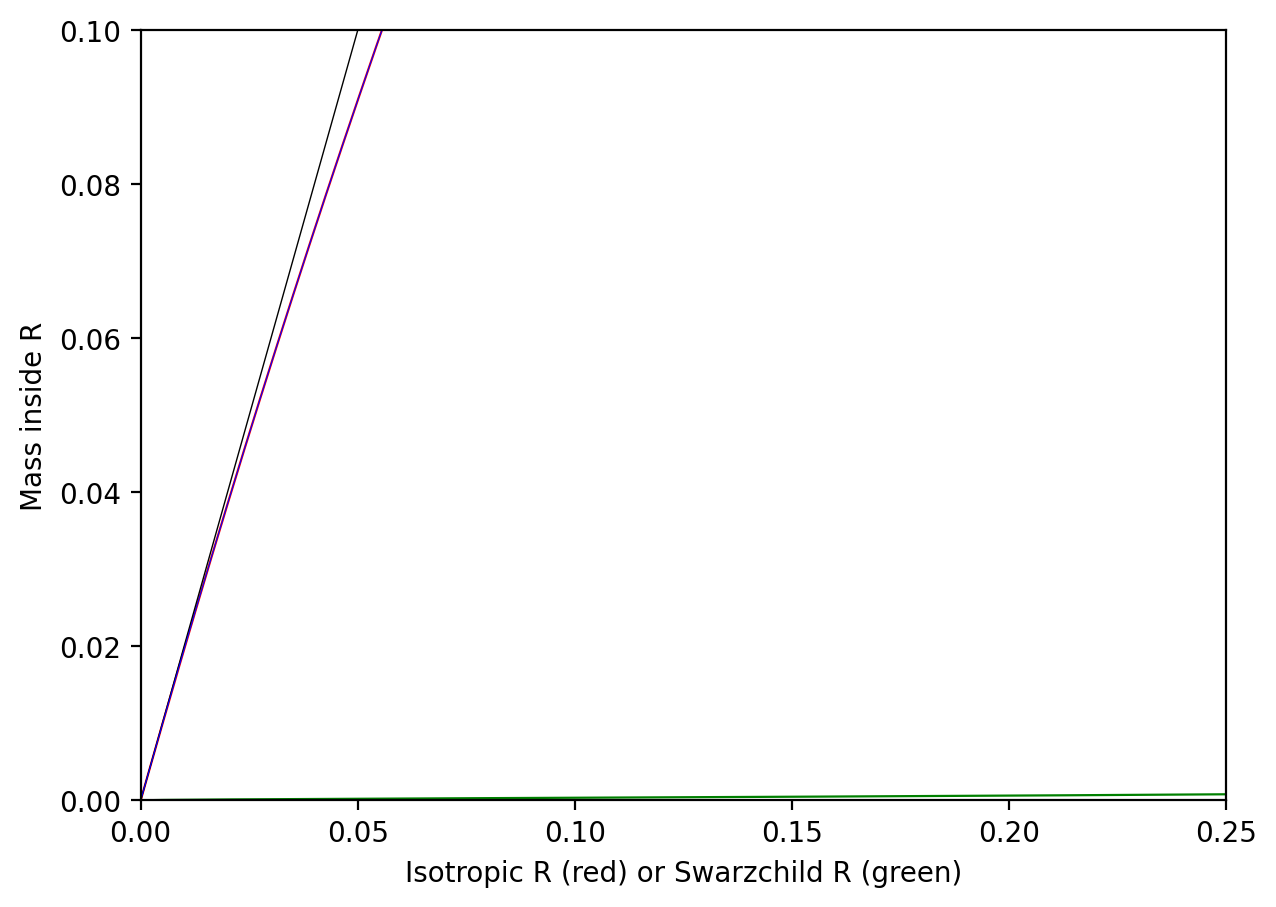

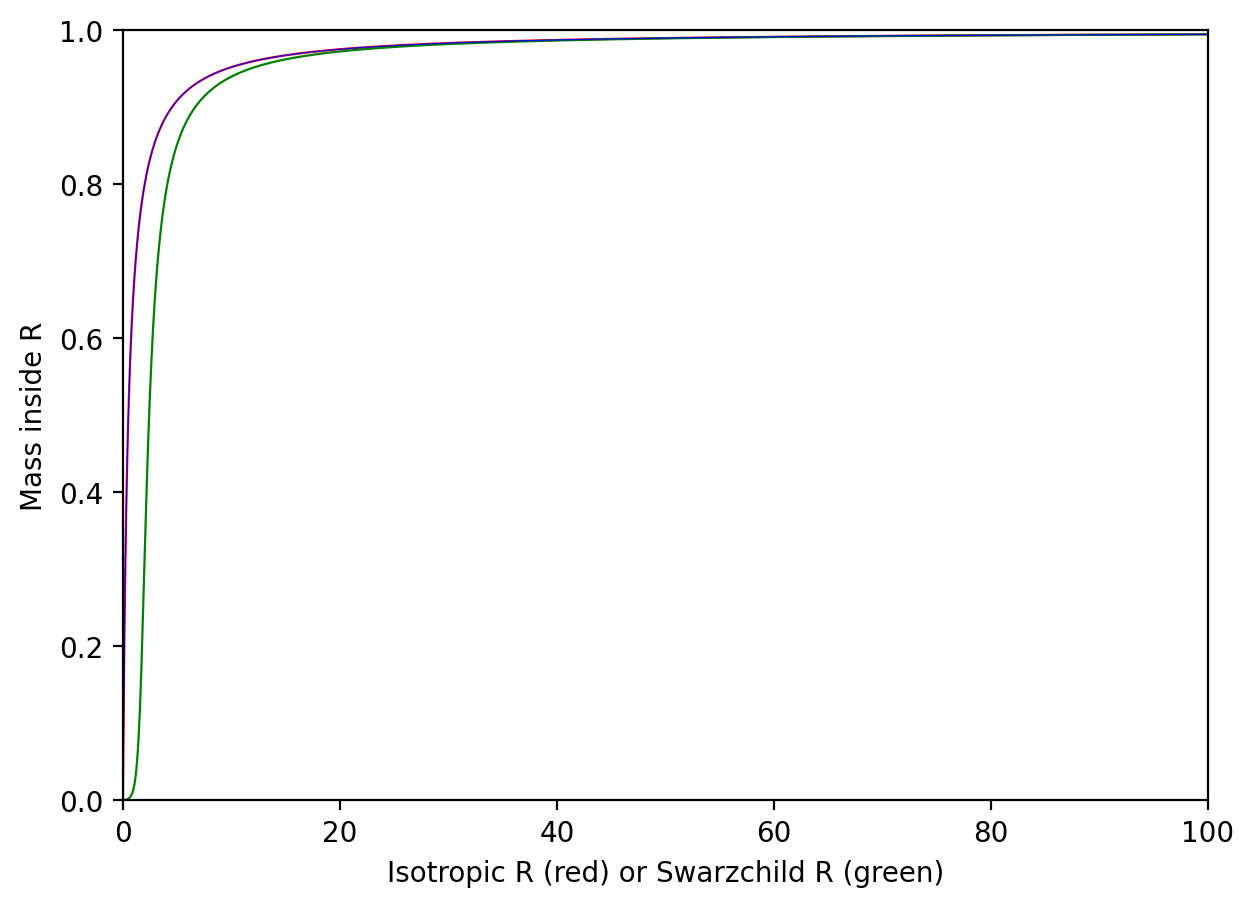

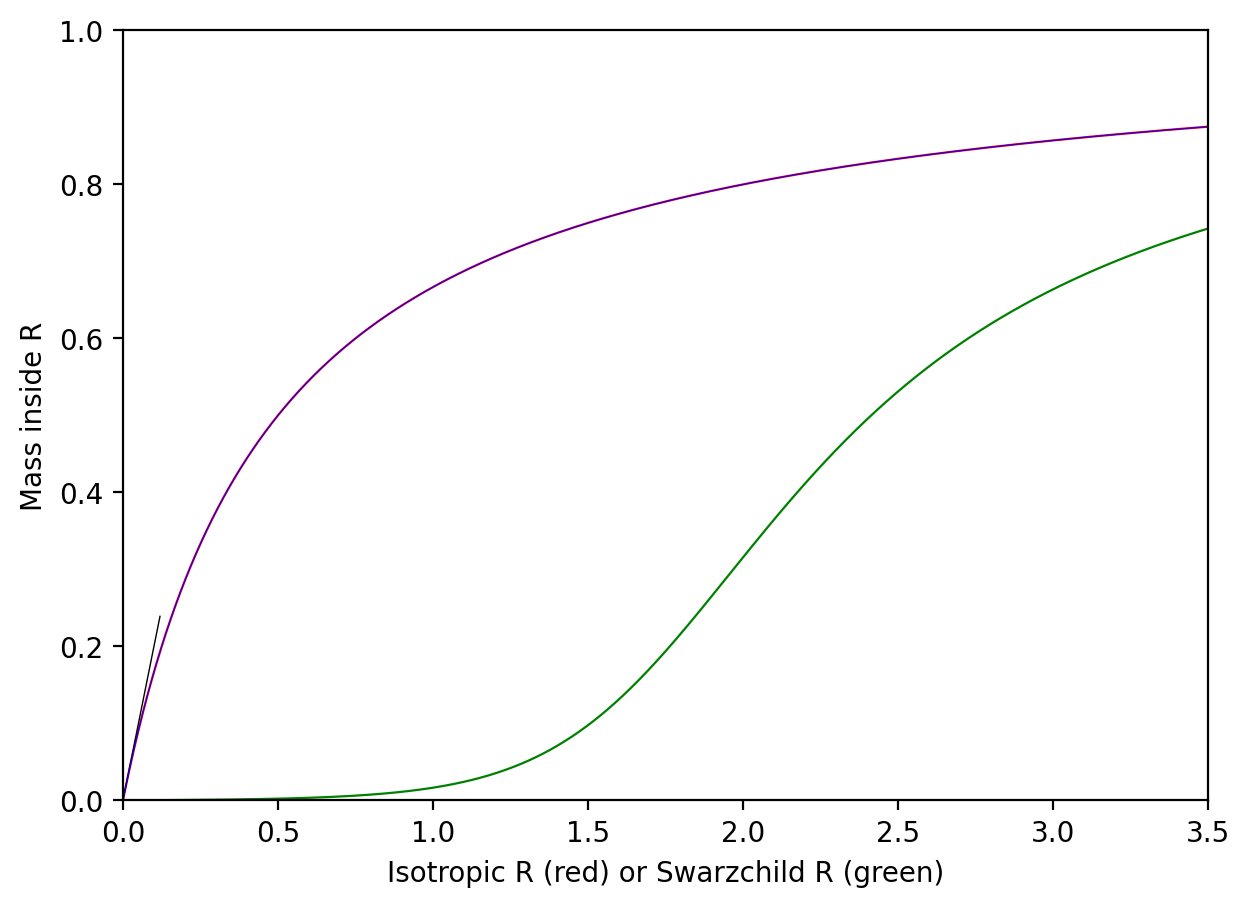

In [92]:
maxPoints = 5000000 # so we don't wipe out...
outerR = 200000.0 # should be infinity, but this is numerics. Consider this as "Shwarschild radius' away from source"

# Next, we will create an empty list that we will use to store the results
# of out calculation.
massInsides = []
rBars = []
drBars = []
katzs = []
fits = []
# We can now use our results list within a for loop and append values
# to list as the loop iterates.
M = 1
k = 1/2 # Katz formula is (dr)*1/2GM^2/r^2, G == 1, 
# prev is mass inside r, it starts with all the mass inside r at 'infinity...'
prev = M
rBar = outerR
stepFraction = 0.00002 # make steps smaller as we approach the min
minStep = 0.0000001
totalMassS = 0.0
totalMassIso = 0.0
#look for the horizon. rBar is M/2 at the horizon
for count in range(maxPoints):
    drBar = rBar*stepFraction + minStep # step in, step size is proportional to rbar...
    midR = rBar + drBar/2 # use midpoint... - more accurate as I tested...
    #katz is mass from rBar to rBar + dr - see Lynden-Bell - Katz 1985 "Gravitational field energy density for spheres and black holes"
    katz = drBar*k*prev*prev/(midR*midR) # that's how much mass we needed to drop into the gravitational field to take this step.
    massInsideRbar = prev - katz
    massInsides.append(massInsideRbar)
    rBars.append(rBar)
    prev = massInsideRbar
    drBars.append(drBar)
    katzs.append(katz)
    
    # calc masses 
    totalMassIso += katz
    
    # find a good fit
    # This is THE function.... - you can see from the graphs 
    y = M - M/(1 + 2*rBar/M)
    fits.append(y)
    rBar -= drBar
    if rBar < 0:
        print('count: ', count)
        print('drBar: ', drBar)
        break


# I need to start from the inner most (ie last) point in the arrays and walk outward to determine the Schwarschild r measurement.
currentRS = 0 #swharzschild R
rSs = []
for i in range(len(drBars) - 1, -1, -1):
    drBar = drBars[i]
    rBar = rBars[i]
    massBirchoff = massInsides[i]
    #using good old swarzchild 
    #rS = rBar(1 - massInsideRbar/(2.0*rBar))**2 #rS in terms of rBar from katz (rS is in good ole coords (see katz 1985 bottom pg 23p))
    # take correct derivative of to get dr/drBar
    localRSFactor = (1 - massBirchoff/(2*rBar))**2 + (massBirchoff*(1 - massBirchoff/(2*rBar)))/rBar
    currentRS += drBar/localRSFactor
    rSs.append(currentRS)

#rSs is in the reverse order of all the other lists
rSs.reverse()

print('totalMassIso:',totalMassIso)
print('totalMassS:',totalMassS)
print('currentRS:',currentRS)
#print('rSs:',rSs)

#define my plot
def my_plot(rBars, massInsides, rSs, fits):
    fig = plt.figure(figsize=(7, 5), dpi=200)
    plt.plot(rBars, massInsides, marker="none", color='red', lw=0.8)
    plt.plot(rSs, massInsides, marker="none", color='green', lw=0.8)
    plt.xlabel('Isotropic R (red) or Swarzchild R (green)');
    plt.ylabel('Mass inside R');
    #plt.vlines(horizonR, ymin=0, ymax=1)

    # Takes list of lines, where each line is a sequence of coordinates
    l1 = [(0, 0), (0.12, 0.24)]
    lc = matplotlib.collections.LineCollection([l1], color=["k"], lw=0.5)

    plt.gca().add_collection(lc)

    plt.plot(rBars,fits, marker="none", color='blue', lw=0.4)


# # origin zoom - also see slope == 1 
my_plot(rBars, massInsides, rSs, fits)
plt.axis((0, 0.25, 0.0, 0.1));
plt.show()

# Full plot 
my_plot(rBars, massInsides, rSs, fits)
plt.axis((0, 100*M, 0.0, 1*M));
plt.show()

# Bigger area around origin 
my_plot(rBars, massInsides, rSs, fits)
plt.axis((0, 3.5*M, 0, 1.0*M));
plt.show()




# observations. 

The slope is 2 near the origin. r == 0 is 'zero mass' - no singularity, no horizon...
For ISO (purple/red line) only a horizon if red line goes above the slope 2 line. 
For Schwarschild only a horizon if green line goes above line with slope 1/2. 

Remember, the slope is almost 2 in isotropic coordinates near the origin

I am looking for this online....

# Calculate the integral...

The mass should add up to M